In [67]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats

# melhorar a visualização
pd.set_option('max_columns',170)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [18]:
#Select a percentage from the time series
def data_proportion(series, percent=1.0):
    series = series[-int(percent * len(series)):]
    return series

In [19]:
df = pd.read_csv('timeserie_train.csv',
                index_col='data', parse_dates=['data'],
                  squeeze=True)



<AxesSubplot:xlabel='data'>

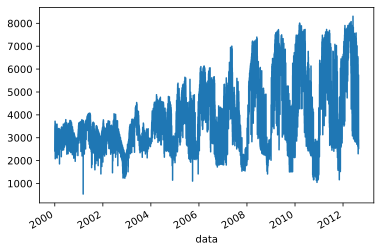

In [20]:
df.plot()


Total of Date:332


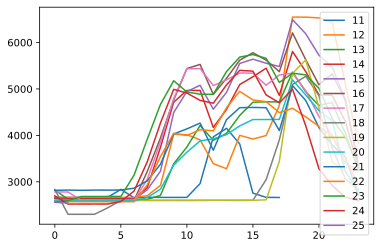

In [21]:
def daily_plot(serie):
    groups = serie.groupby(pd.Grouper(freq='D'))
    values = list()
    days = list()
    for name, group in groups:
        df = pd.DataFrame(group.values)
        values.append(df)
        days.append(name.day)
    df = pd.concat(values, ignore_index=True, axis=1)
    df.columns = days
    df.plot(subplots=False, legend=True)

daily_data = data_proportion(df, percent=0.003)
print(f'Total of Date:{len(daily_data)}')
daily_plot(daily_data)

Total of Date:1108


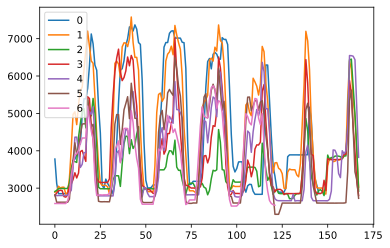

In [22]:
def weekly_plot(serie):
    groups = serie.groupby(pd.Grouper(freq='W'))
    values = list()
    weeks = list()
    for name, group in groups:
        df = pd.DataFrame(group.values)
        values.append(df)
        weeks.append(name.week)
    df = pd.concat(values, ignore_index=True, axis=1)
    df.plot(subplots=False, legend=True)

weekly_data = data_proportion(df, percent=0.01)
print(f'Total of Date:{len(weekly_data)}')
weekly_plot(weekly_data)

Total of Date:2217


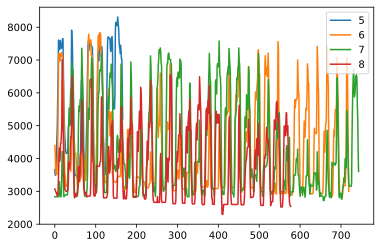

In [23]:
def month_plot(serie):
    groups = serie[8:].groupby(pd.Grouper(freq='M'))
    values = list()
    months = list()
    for name, group in groups:
        df = pd.DataFrame(group.values)
        values.append(df)
        months.append(name.month)
    df = pd.concat(values, ignore_index=True, axis=1)
    df.columns = months
    df.plot(subplots=False, legend=True)
    
monthly_data = data_proportion(df, percent=0.02)
print(f'Total of Date:{len(monthly_data)}')
month_plot(monthly_data)

In [24]:
df = pd.read_csv('timeserie_train.csv', parse_dates=['data'], index_col='data')

In [25]:
df['d-semana'] = [d.strftime('%A') for d in df.index]
df['mes'] = [d.strftime('%b') for d in df.index]
df['ano'] = [d.year for d in df.index]

[Text(0, 0, 'Saturday'),
 Text(1, 0, 'Sunday'),
 Text(2, 0, 'Monday'),
 Text(3, 0, 'Tuesday'),
 Text(4, 0, 'Wednesday'),
 Text(5, 0, 'Thursday'),
 Text(6, 0, 'Friday')]

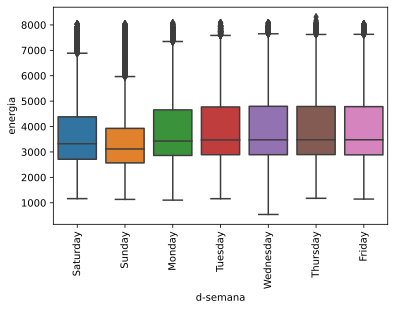

In [26]:
b = sns.boxplot(x='d-semana', y='energia', data=df)
b.set_xticklabels(b.get_xticklabels(),rotation=90)

<AxesSubplot:xlabel='mes', ylabel='energia'>

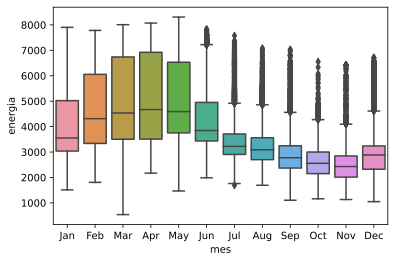

In [27]:
sns.boxplot(x='mes', y='energia', data=df)

<AxesSubplot:xlabel='ano', ylabel='energia'>

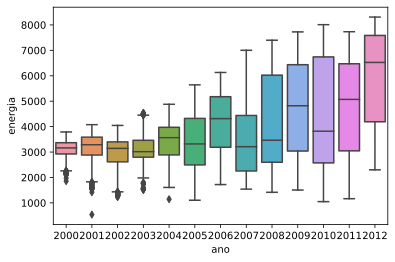

In [28]:
sns.boxplot(x='ano', y='energia', data=df)

In [29]:
df = pd.read_csv('timeserie_train.csv',
                index_col='data', parse_dates=['data'],
                  squeeze=True)


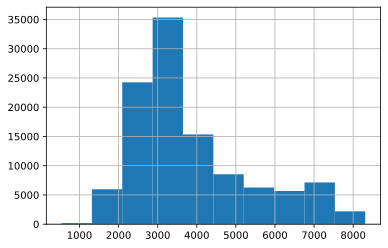

In [40]:
df.hist()
plt.show()

In [41]:
mean = df.mean()
var = df.var()
print("Media: %f\n" %(mean))
print("Variancia1:%f\n" % (var))

Media: 3857.764251

Variancia1:2368074.999394



In [59]:
def rolling_mean(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(24*365).mean()
    rolstd = timeseries.rolling(24*365).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    from arch.unitroot import ADF
    adf = ADF(df)
    print(adf.summary().as_text())

    from arch.unitroot import PhillipsPerron
    pp = PhillipsPerron(df)
    print(pp.summary().as_text())

    from arch.unitroot import KPSS
    kpss = KPSS(df)
    print(kpss.summary().as_text())

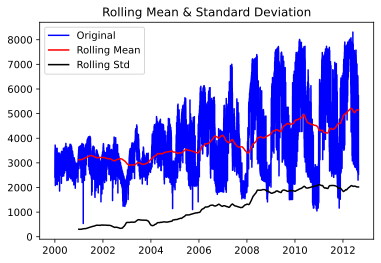

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.780
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -18.606
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                 12.339
P-value                         0.000
Lags                              191
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null 

In [60]:
def check_stationary(timeseries):
    rolling_mean(timeseries)

check_stationary(df)

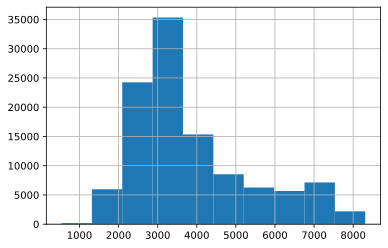

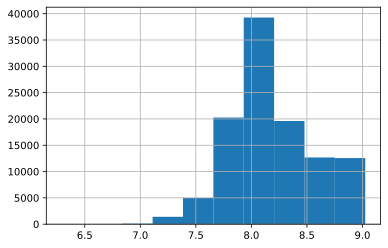

In [68]:
df_log = np.log(df)
df.hist()
plt.show()

df_log.hist()
plt.show()

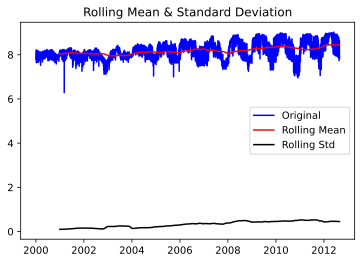

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.780
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -18.606
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                 12.339
P-value                         0.000
Lags                              191
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null 

In [69]:
check_stationary(df_log)

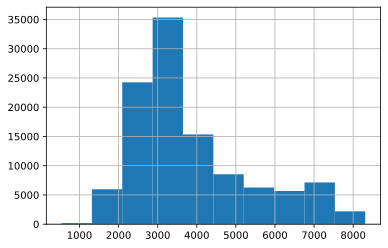

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

In [74]:
fitted_data, fitted_lambda = stats.boxcox(df) 
df.hist()
plt.show()

fitted_data.hist()
plt.show()

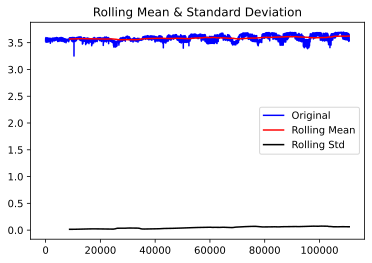

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.780
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -18.606
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                 12.339
P-value                         0.000
Lags                              191
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null 

AttributeError: 'numpy.ndarray' object has no attribute 'rolling'

In [77]:
fitted_data, fitted_lambda = stats.boxcox(df) 
rolling_mean(pd.DataFrame(fitted_data))
check_stationary(fitted_data)